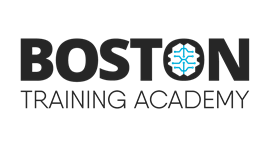

**Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures**.

Here is some of the functionality that seaborn offers:

- A dataset-oriented API for examining relationships between multiple variables

- Specialized support for using categorical variables to show observations or agg-regate statistics

- Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data

- Automatic estimation and plotting of linear regression models for different kinds dependent variables

- Convenient views onto the overall structure of complex datasets

- High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations

- Concise control over matplotlib figure styling with several built-in themes

- Tools for choosing color palettes that faithfully reveal patterns in your data

Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

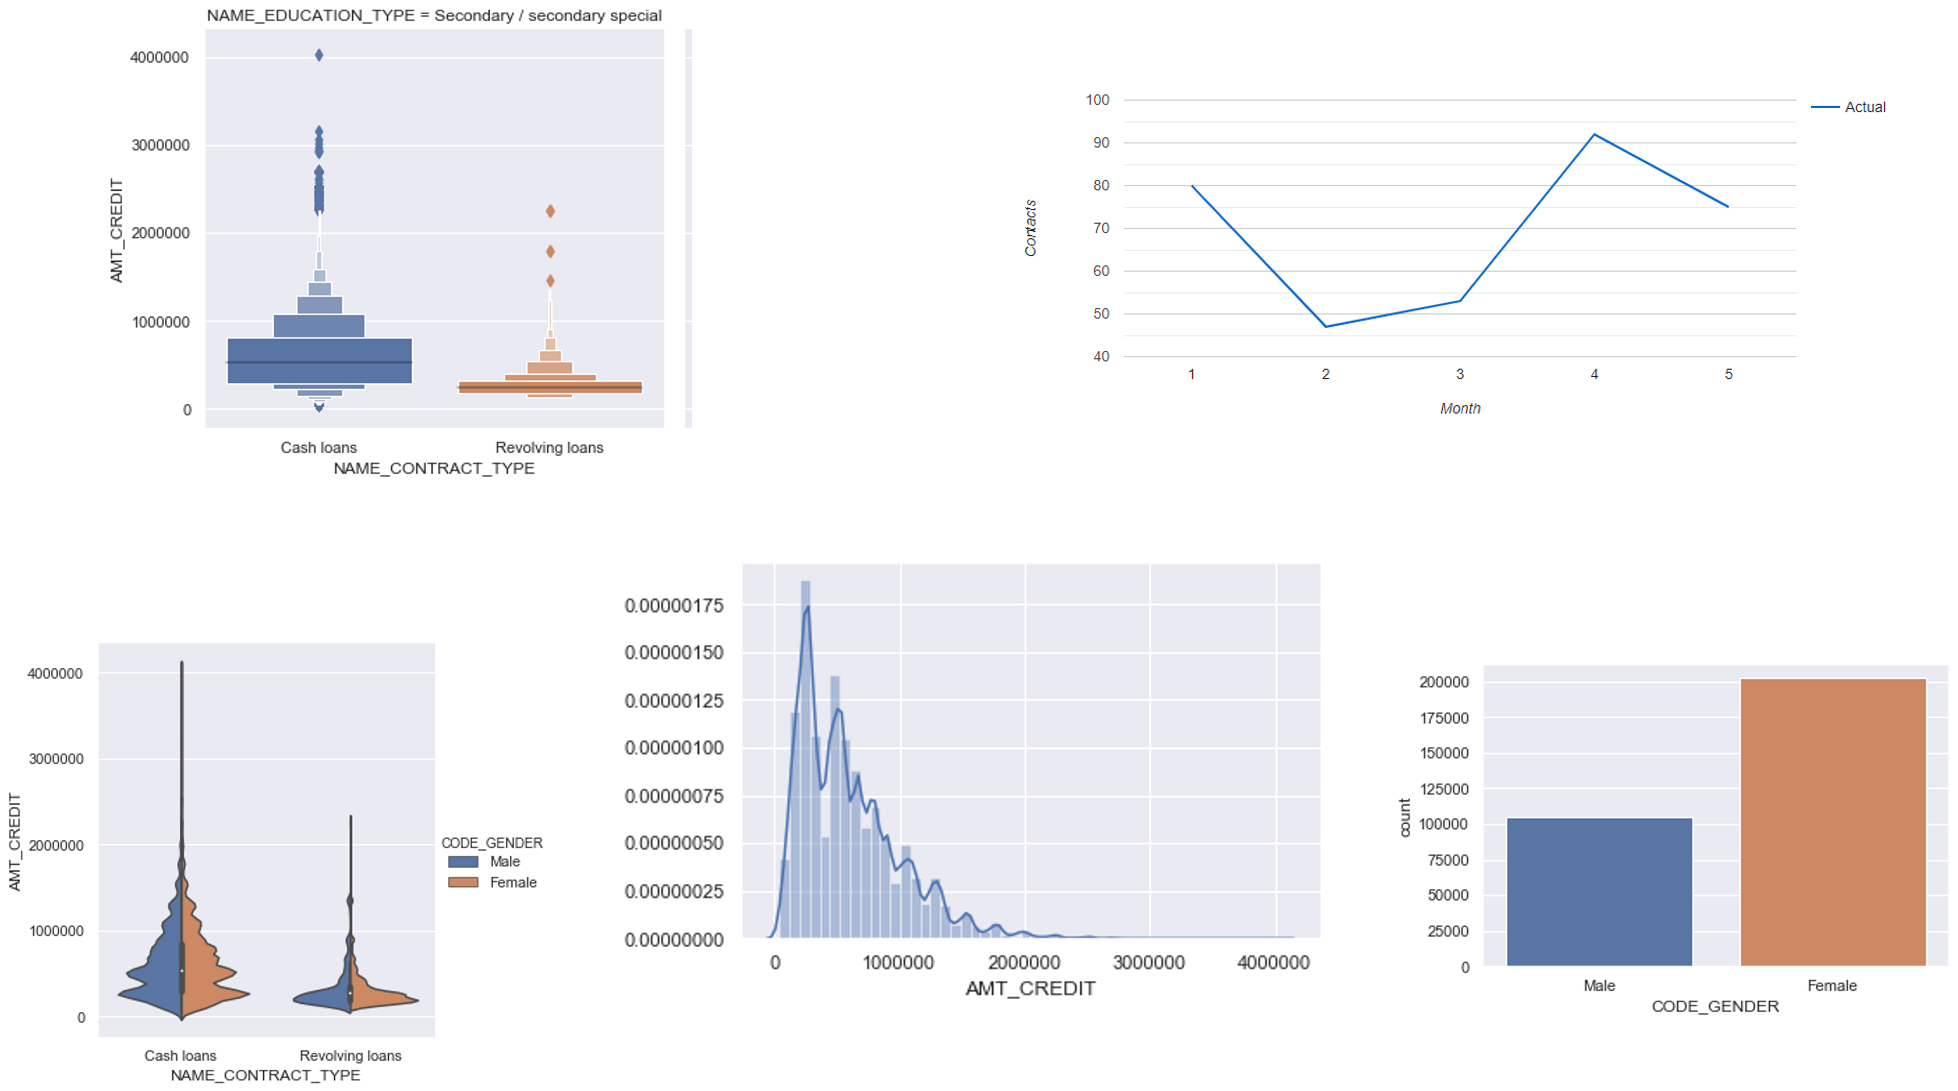

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'application_train.csv')

### Retrive the info of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Retrive the top 10 rows of the dataset

In [4]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### FInd the sum of missing values in the dataset

In [5]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Lets pull out columns that have less than 50% Datapoints missing.

In [6]:
df_less_than_50=data.columns[(data.isnull().sum()/data.shape[0]<0.5)]

In [7]:
data_mod=data[df_less_than_50]

In [8]:
data_mod.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The columns Gender is coded as M for Male,F for Female. Lets Change it to Male & Female instead of M & F

In [9]:
data_mod['CODE_GENDER']=data_mod['CODE_GENDER'].replace({"M":"Male","F":"Female"})

C:\Users\recer\AppData\Local\Temp/ipykernel_13960/297100206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mod['CODE_GENDER']=data_mod['CODE_GENDER'].replace({"M":"Male","F":"Female"})


We have a lot of categorical variables in the dataset let see the distinct count for each column

In [10]:
col_cat_count_data_mod=data_mod.select_dtypes(include='object').apply(pd.Series.nunique, axis = 0)
col_cat_count_data_mod

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
EMERGENCYSTATE_MODE            2
dtype: int64

### Lets start visualization of the data

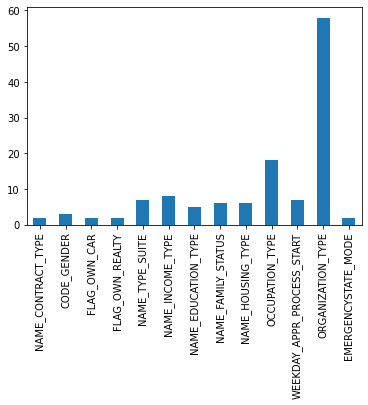

In [11]:
col_cat_count_data_mod.plot.bar()
plt.show()

Lets count the Gender columns and then Visualize 

<AxesSubplot:>

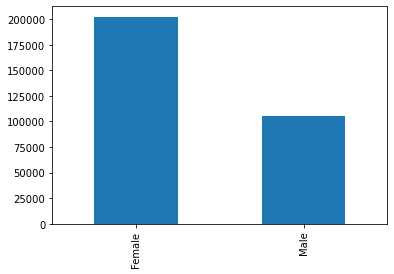

In [15]:
data_mod['CODE_GENDER'].value_counts().plot.bar()

few datapoints are missing so what can we do???
- Will you Impute them
- Will you Drop them

In [16]:
data_mod['CODE_GENDER'].value_counts()

Female    202448
Male      105059
XNA            4
Name: CODE_GENDER, dtype: int64

In [14]:
data_mod=data_mod[data_mod['CODE_GENDER']!='XNA']

### As you can see the Plots look very dull let add some spice to the graphs

# Categorical Data Plots

## Show the counts of observations in each categorical bin using bars.
**seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)**

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

- A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

- A “wide-form” DataFrame, such that each numeric column will be plotted.

- An array or list of vectors.

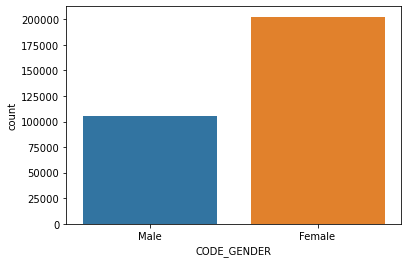

In [19]:
sns.countplot(data=data_mod,x='CODE_GENDER')
plt.show()

We add a filter to the countplot

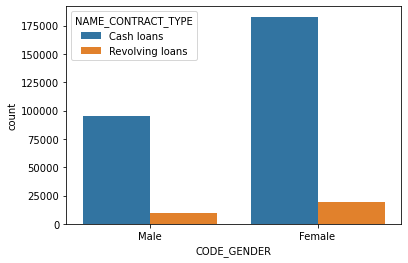

In [20]:
sns.countplot(data=data_mod,x='CODE_GENDER',hue='NAME_CONTRACT_TYPE')
plt.show()

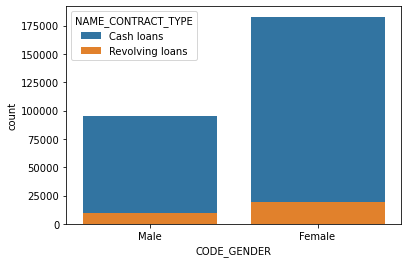

In [24]:
sns.countplot(data=data_mod,x='CODE_GENDER',hue='NAME_CONTRACT_TYPE',dodge= False)
plt.show()

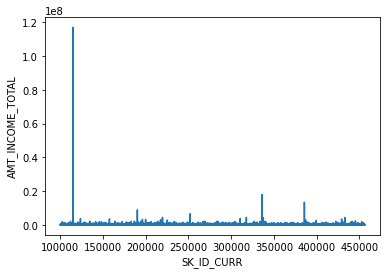

In [25]:
sns.lineplot(data=data_mod,x='SK_ID_CURR',y='AMT_INCOME_TOTAL')
plt.show()

As you can see we are having 0.3 million datapoints and the figure size is small, let make it big by passing **figsize**

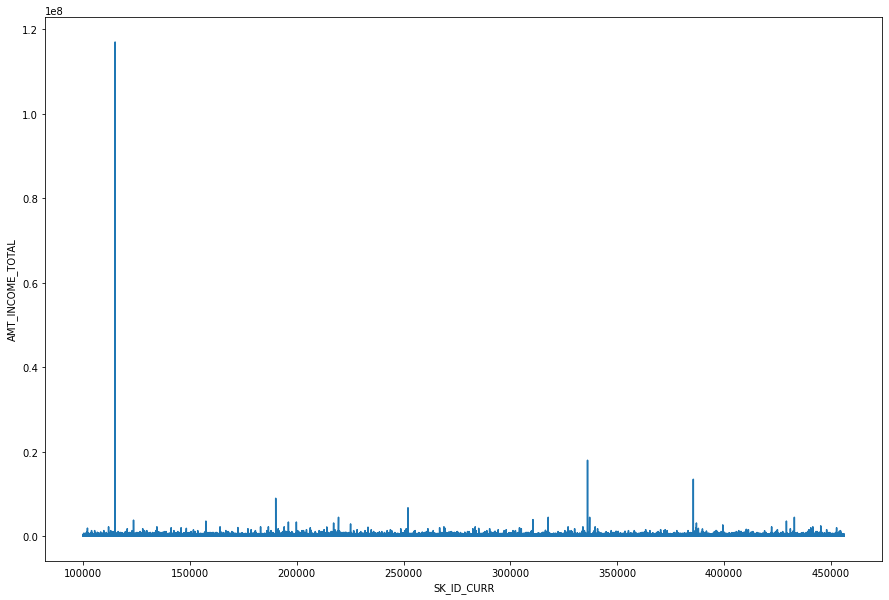

In [26]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data_mod,x='SK_ID_CURR',y='AMT_INCOME_TOTAL')
plt.show()

## Seaborn.catplot
This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:

Categorical scatterplots:

- stripplot() (with kind="strip"; the default)

- swarmplot() (with kind="swarm")

Categorical distribution plots:

- boxplot() (with kind="box")

- violinplot() (with kind="violin")

- boxenplot() (with kind="boxen")

Categorical estimate plots:

- pointplot() (with kind="point")

- barplot() (with kind="bar")

- countplot() (with kind="count")

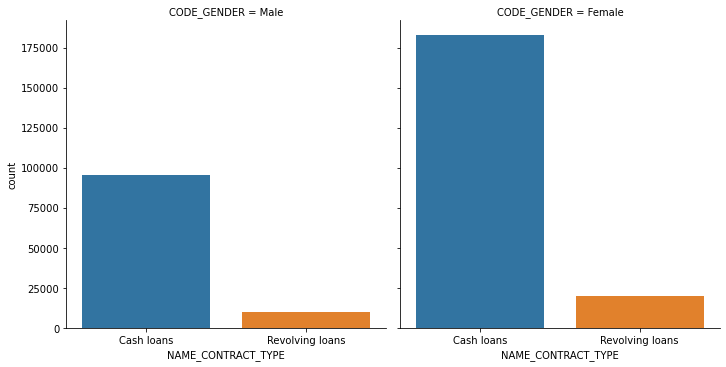

In [27]:
sns.catplot(data=data_mod,col='CODE_GENDER',x='NAME_CONTRACT_TYPE',kind="count")
plt.show()

### Box Plot
The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum

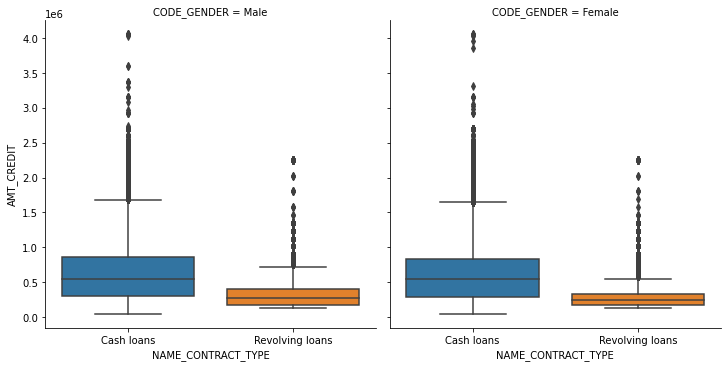

In [28]:
sns.catplot(data=data_mod,col='CODE_GENDER',x='NAME_CONTRACT_TYPE',kind="box",y='AMT_CREDIT')
plt.show()

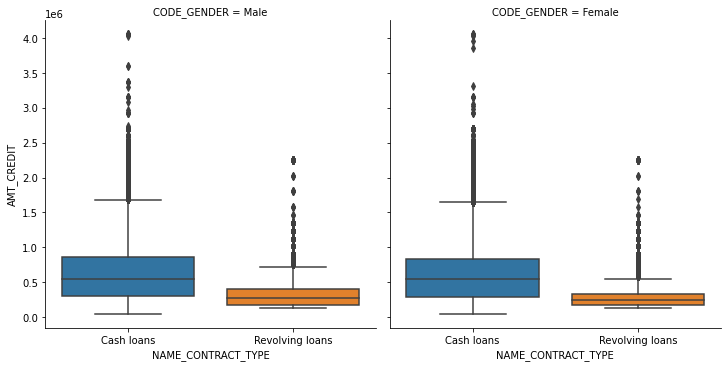

In [30]:
sns.catplot(data=data_mod,col='CODE_GENDER',x='NAME_CONTRACT_TYPE',kind="box",y='AMT_CREDIT',col_wrap=2)
plt.show()

### Boxen plot
Draw an enhanced box plot for larger datasets.

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. For a more extensive explanation, you can read the paper that introduced the plot:

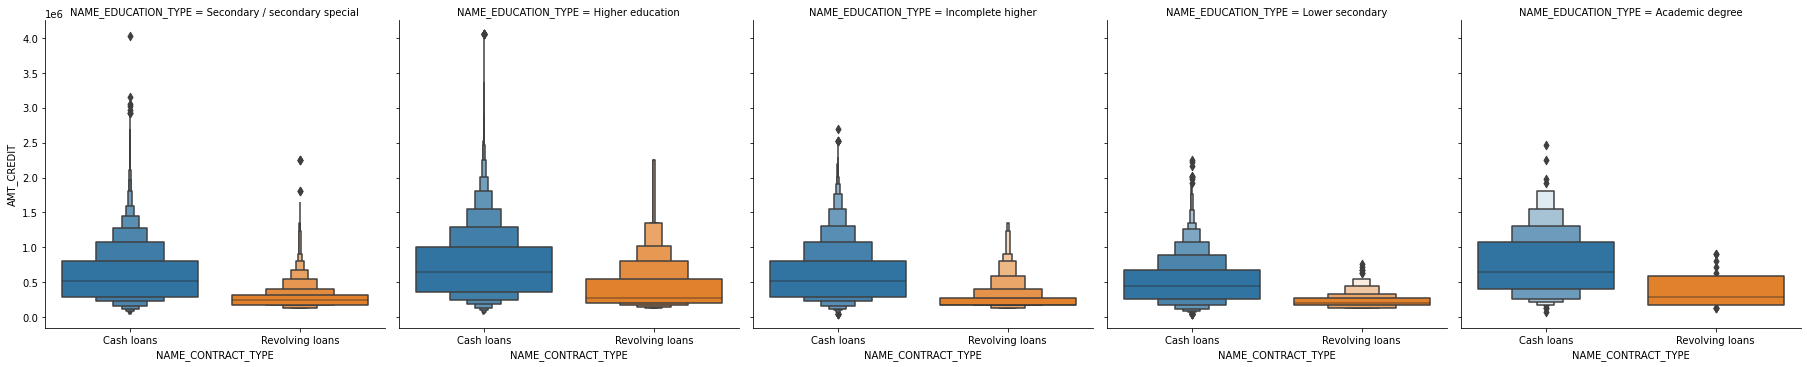

In [29]:
sns.catplot(data=data_mod,col='NAME_EDUCATION_TYPE',x='NAME_CONTRACT_TYPE',kind="boxen",y='AMT_CREDIT')
plt.show()

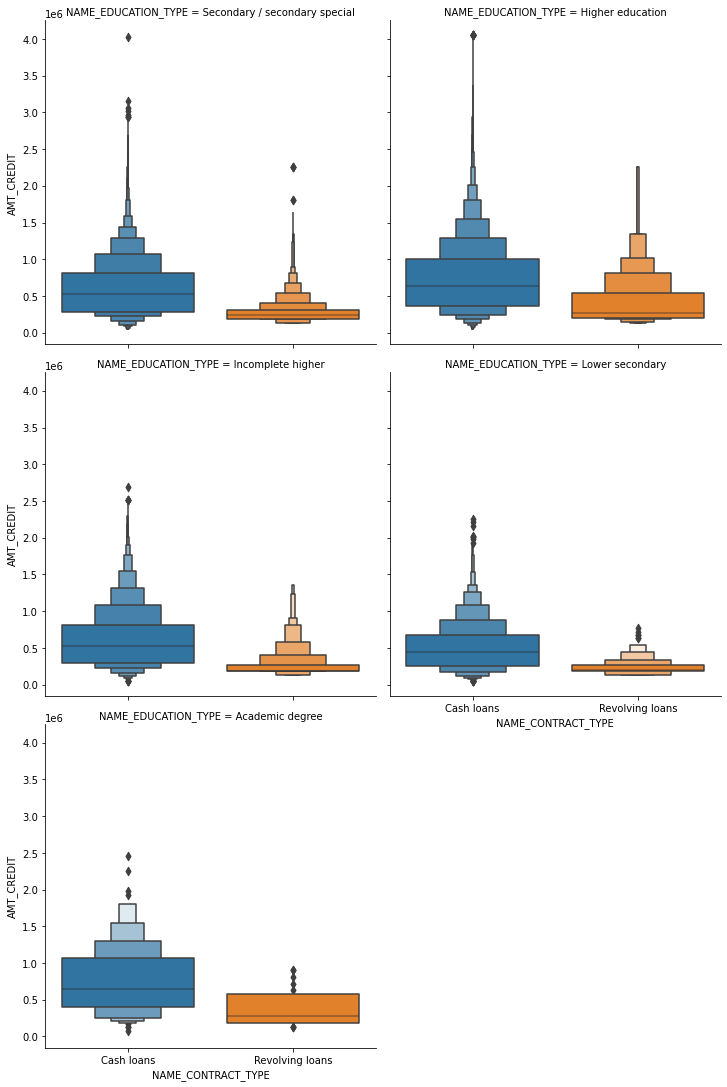

In [31]:
sns.catplot(data=data_mod,col='NAME_EDUCATION_TYPE',x='NAME_CONTRACT_TYPE',kind="boxen",y='AMT_CREDIT',col_wrap=2)
plt.show()

### Violin plots
- A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions


#### kernel density estimation (KDE)
is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

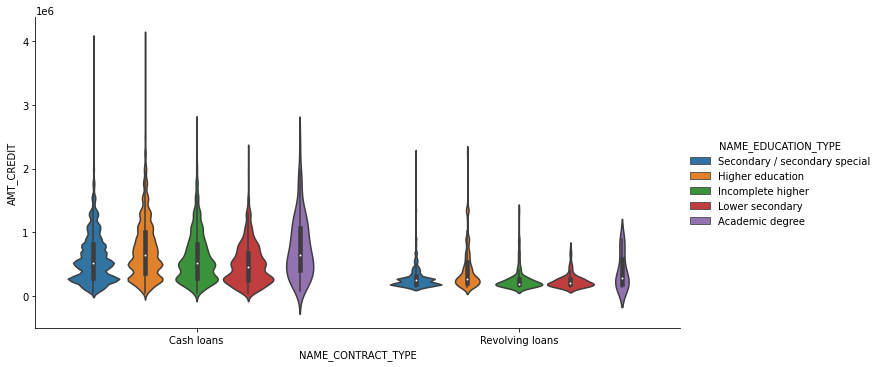

In [32]:
sns.catplot(data=data_mod,x='NAME_CONTRACT_TYPE',kind="violin",y='AMT_CREDIT',hue='NAME_EDUCATION_TYPE',aspect=1.9)
plt.show()

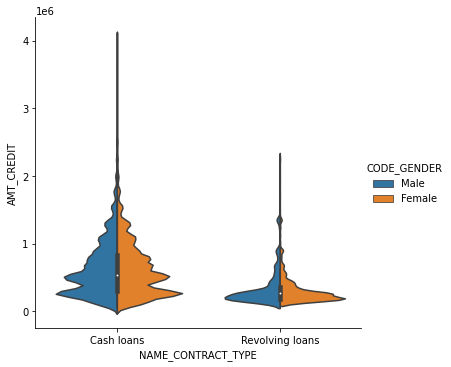

In [33]:
sns.catplot(data=data_mod,x='NAME_CONTRACT_TYPE',kind="violin",y='AMT_CREDIT',hue='CODE_GENDER',split=True)
plt.show()

## Plotting univariate data distributions

C:\Users\recer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


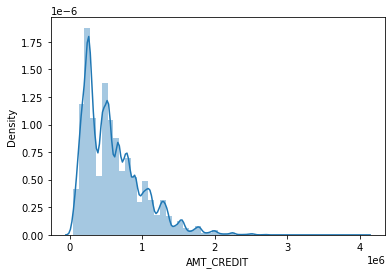

In [9]:
sns.distplot(data_mod['AMT_CREDIT'])
plt.show()

C:\Users\recer\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_CREDIT'>

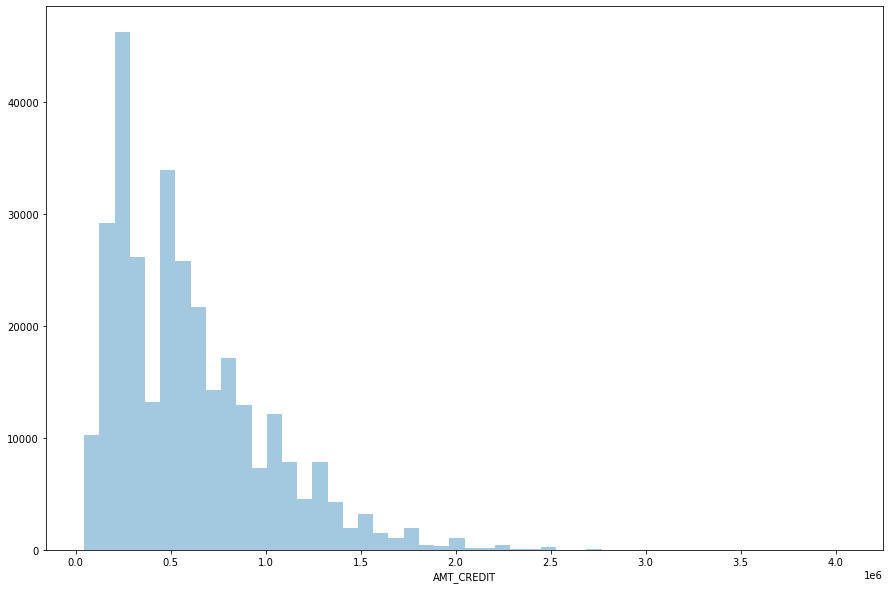

In [35]:
plt.figure(figsize=(15,10))
sns.distplot(data_mod['AMT_CREDIT'], kde=False)

C:\Users\recer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

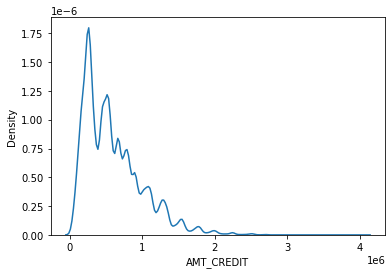

In [10]:
sns.distplot(data_mod['AMT_CREDIT'], hist=False)

## Plotting bivariate distributions

##### seaborn.jointplot
Draw a plot of two variables with bivariate and univariate graphs.
This function provides a convenient interface to the JointGrid class, with several canned plot kinds. 

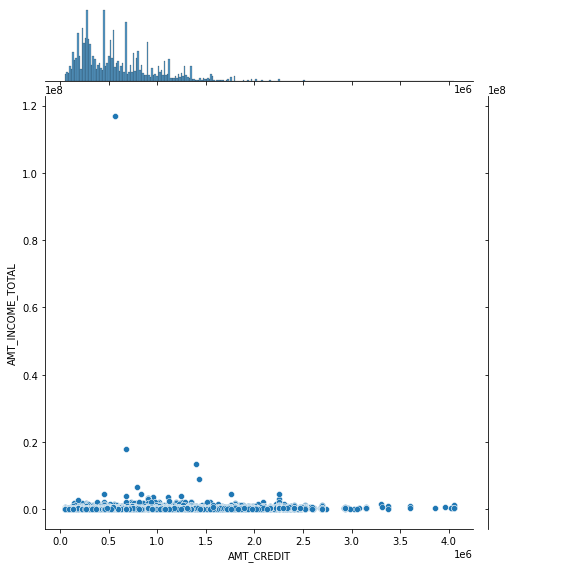

In [37]:
sns.jointplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", data=data_mod,height=8)

Let's remove the anomalies(outliers) from the columns AMT_INCOME_TOTAL

In [11]:
data_mod['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
data_mod['AMT_INCOME_TOTAL'].max()

117000000.0

In [16]:
data_mod_out=data_mod[data_mod['AMT_INCOME_TOTAL'] < data_mod['AMT_INCOME_TOTAL'].mean()]

In [17]:
data_mod_out['AMT_INCOME_TOTAL'].describe()

count    187135.000000
mean     114384.446434
std       31260.003090
min       25650.000000
25%       90000.000000
50%      112500.000000
75%      135000.000000
max      168750.000000
Name: AMT_INCOME_TOTAL, dtype: float64

Lets now check the plot and see the difference 

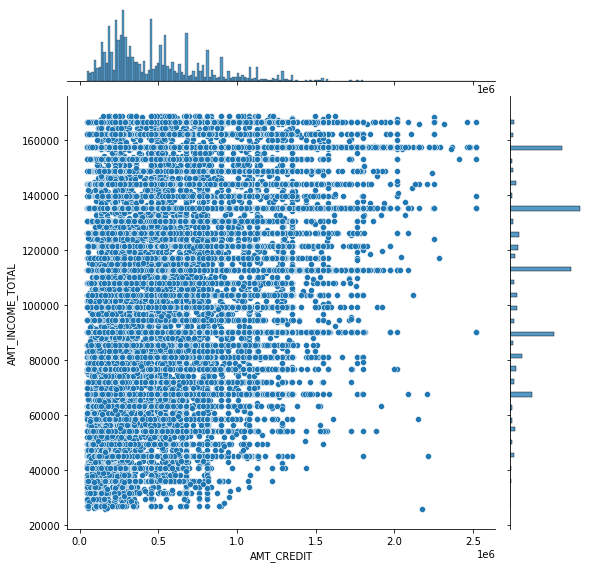

In [18]:
sns.jointplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", data=data_mod_out,height=8)

## TASK 1: REMOVE OUTLIERS IN THE COLUMN AMT_INCOME_TOTAL AND THEN BUILD THE BIVARIATE PLOTS

Share the plot in the chat!!!!!

#### Hexbin plots
The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets

In [19]:
data_mod_out=data_mod[data_mod['AMT_INCOME_TOTAL'] < data_mod['AMT_INCOME_TOTAL'].mean()]

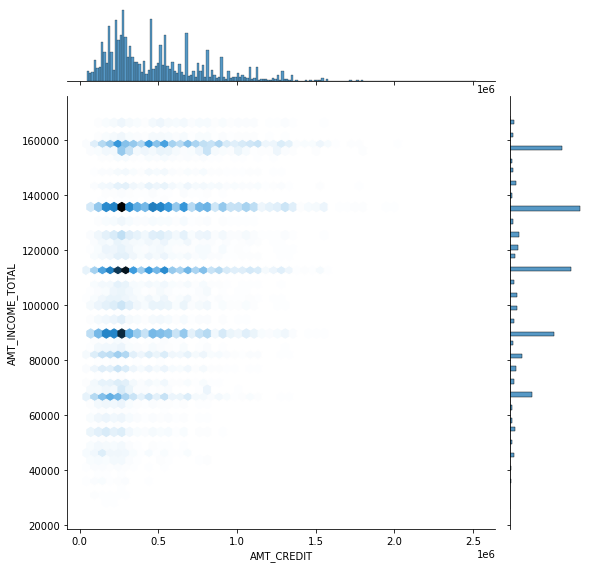

In [20]:
sns.jointplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL",height=8,kind='hex',data=data_mod_out)

## Visualizing pairwise relationships

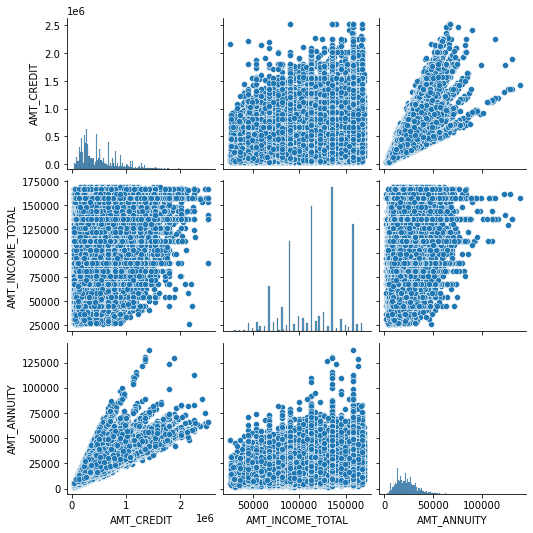

In [21]:
sns.pairplot(data_mod_out[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY']])

LinAlgError: 2-th leading minor of the array is not positive definite

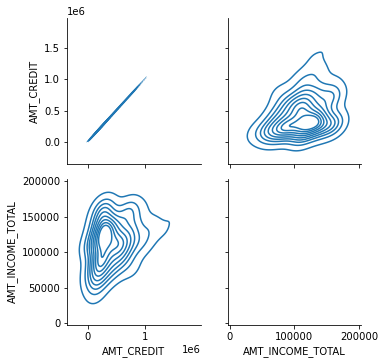

In [22]:
vs=sns.PairGrid(data_mod_out[['AMT_CREDIT','AMT_INCOME_TOTAL']].iloc[0:100,:])
vs.map(sns.kdeplot)

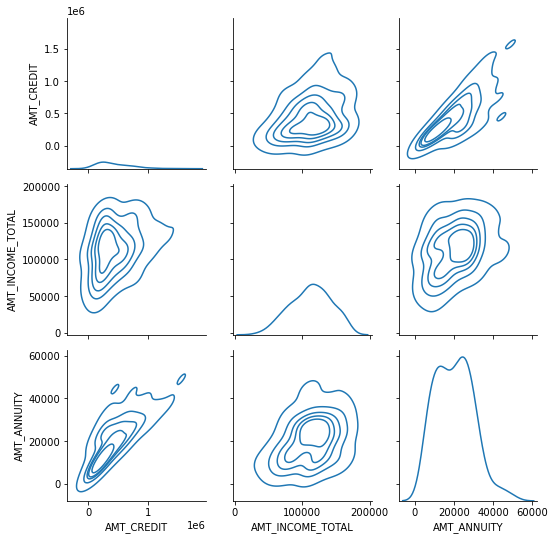

In [23]:
vs=sns.PairGrid(data_mod_out[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY']].iloc[0:100,:])
vs.map_diag(sns.kdeplot)
vs.map_offdiag(sns.kdeplot, n_levels=6)

### seaborn.heatmap
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes 

In [25]:
ht_map=data_mod_out[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY']].iloc[0:10000,:]

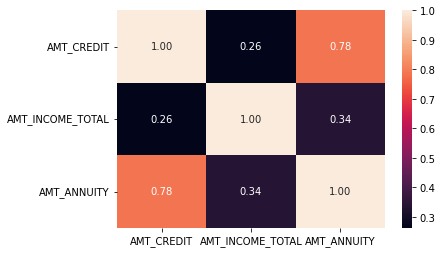

In [26]:
sns.heatmap(ht_map.corr(), annot=True, fmt=".2f")
plt.show()

### seaborn.relplot

seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)

Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")

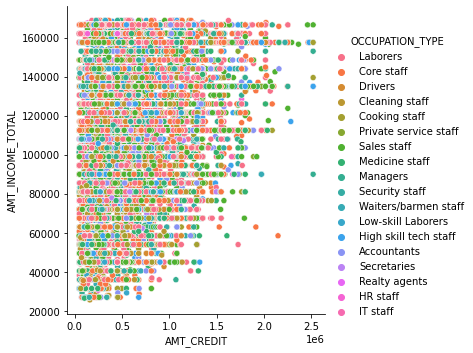

In [27]:
sns.relplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", hue="OCCUPATION_TYPE", data=data_mod_out)
plt.show()

Varying the size of the Bibble using the size options

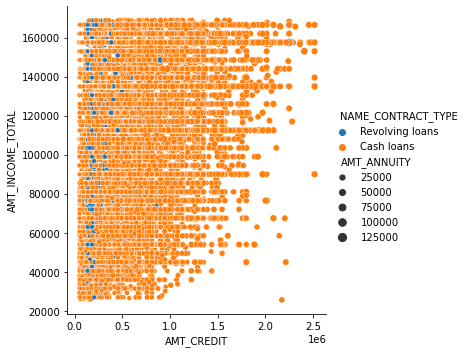

In [28]:
sns.relplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", hue="NAME_CONTRACT_TYPE",size='AMT_ANNUITY',data=data_mod_out)
plt.show()

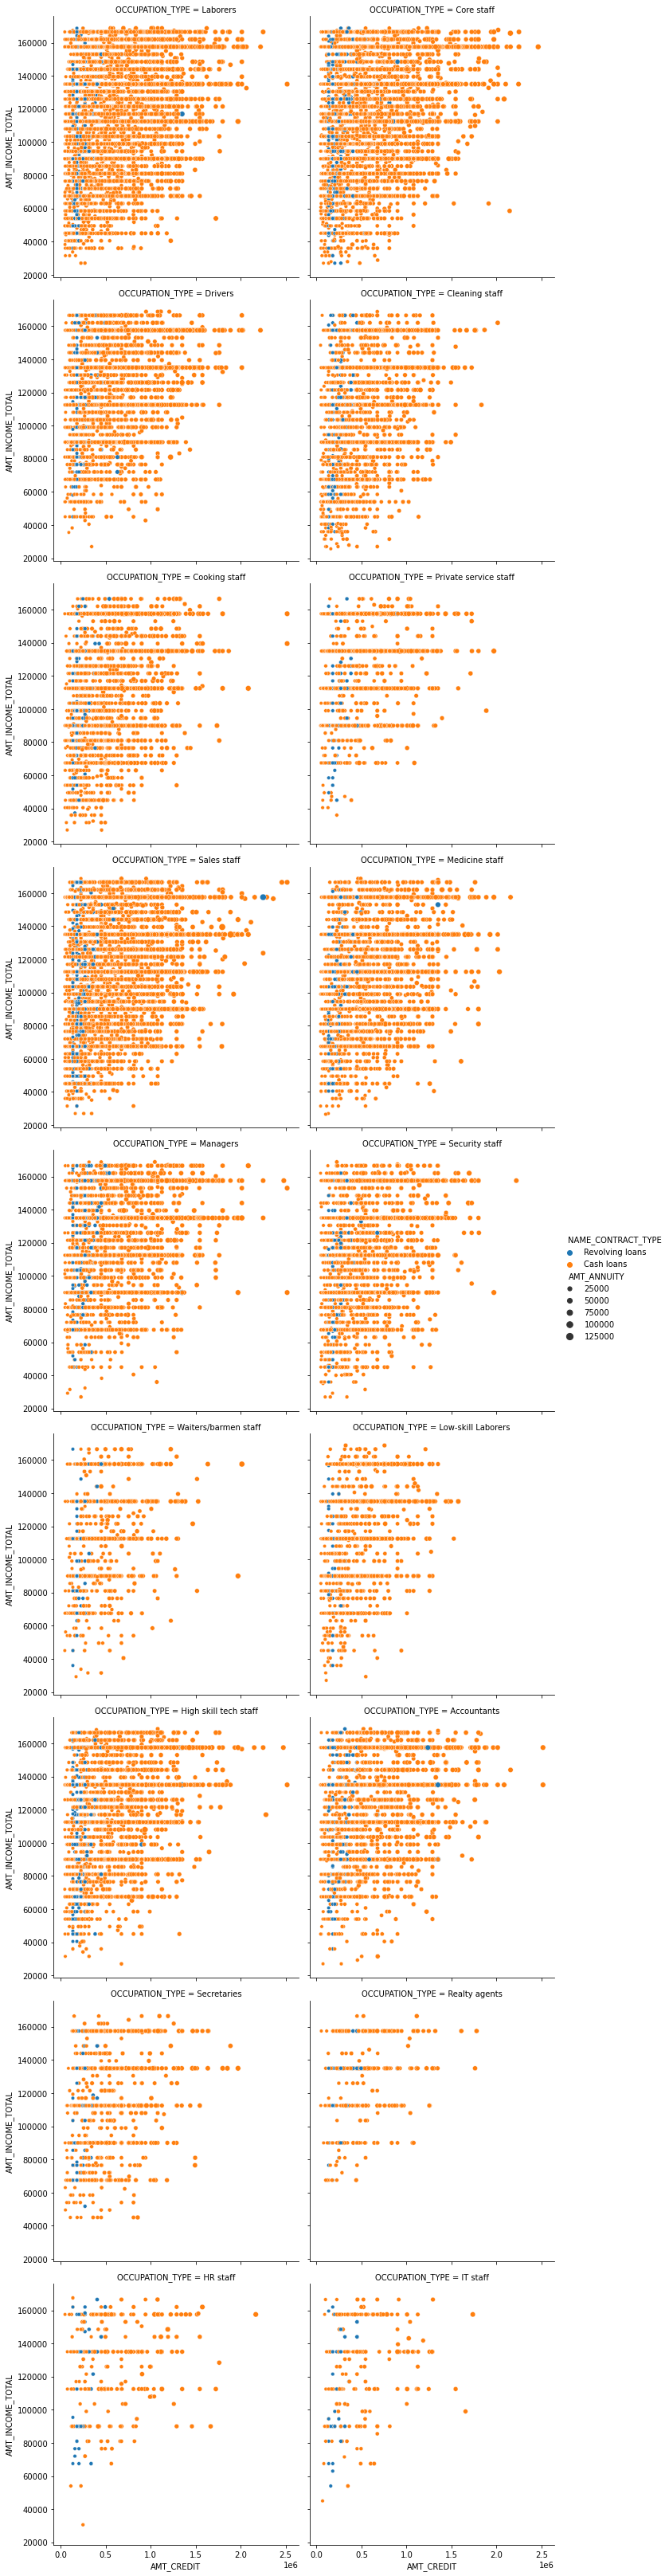

In [29]:
sns.relplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL",size='AMT_ANNUITY',hue="NAME_CONTRACT_TYPE",col="OCCUPATION_TYPE",col_wrap=2,data=data_mod_out)
plt.show()

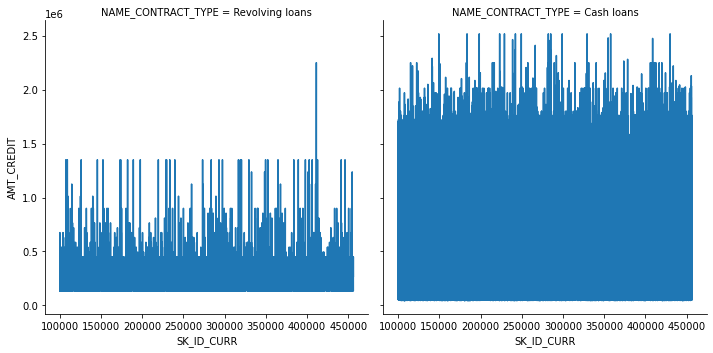

In [30]:
sns.relplot(x="SK_ID_CURR", y="AMT_CREDIT", col="NAME_CONTRACT_TYPE",kind="line", data=data_mod_out)
plt.show()

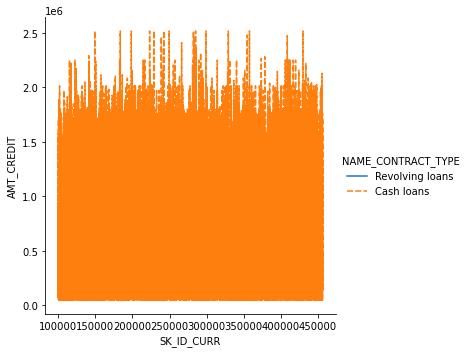

In [31]:
sns.relplot(x="SK_ID_CURR", y="AMT_CREDIT", hue="NAME_CONTRACT_TYPE",style="NAME_CONTRACT_TYPE",kind="line", data=data_mod_out)
plt.show()

## https://plotly.com/graphing-libraries/